## LEVEL-1 -----  TASK- 1: Data Exploration and Preprocessing

In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Exploration of Data 

In [3]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print('No of Duplicates: ', duplicates)

No of Duplicates:  0


In [4]:
# No of rows
print('No of Rows: ', df.shape[0]) 
# No of Columns      
print('No of Columns:' ,df.shape[1])

No of Rows:  9551
No of Columns: 21


In [5]:
# Checking for Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Checking for Missing values

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

**Observation:**
- Cuisines column has 9 missing values

In [7]:
# Filling missing values with unknown
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [8]:
# Rechecking for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

**Observation:**
- There are no null values.

### Analyzing the Target variable distribution

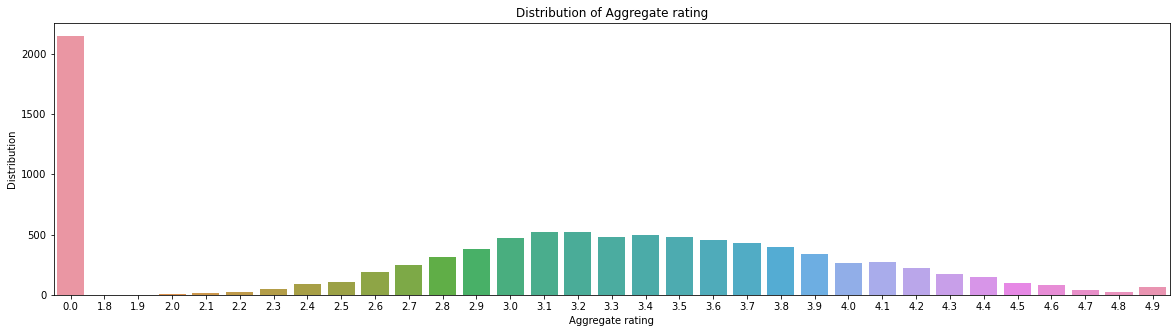

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(x = df['Aggregate rating'])
plt.title('Distribution of Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Distribution')

plt.show()

**Observation:**
- There are less Aggregate ratings between 0 and 2.

### Identifying the Class Imbalance

In [10]:
df['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

**Observation:**
- There is Uneven distribution between the ratings.
- There are more restaurants with ratings Between 3.0 to 3.8.

## Insights of TASK-1

- There are Various restaurants information from different cities.
- There are 9551 rows and 21 columns.
- No duplicates in the data.
- There are only 9 null values in Cuisines feature. As data plays crucial role the nan values are filled with "Unknown".
- The distribution of Target Variable(Aggregate rating) is Uneven.

# TASK-2:  Descriptive Analysis

- Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.
- Explore the distribution of categorical
variables like "Country Code,
" "City,
" and
"Cuisines.
"
- Identify the top cuisines and cities with the
highest number of restaurants.

## Basic Statistics Measures

In [11]:
# Statistics measures for all Numerical columns
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
# Longitude - Statistical Analysis
print('Longitude - Minimum:',df['Longitude'].min())
print('Longitude - Maximum:',df['Longitude'].max())
print('Longitude - Median:',df['Longitude'].median())
print('Longitude - Mean:',df['Longitude'].mean())
print('Longitude - Std:',df['Longitude'].std())

Longitude - Minimum: -157.948486
Longitude - Maximum: 174.8320893
Longitude - Median: 77.1919642
Longitude - Mean: 64.12657446168703
Longitude - Std: 41.467057847617575


In [13]:
# Latitude - Statistical Analysis
print('Latitude - Minimum: ',df['Latitude'].min())
print('Latitude - Maximum:',df['Latitude'].max())
print('Latitude - Median:',df['Latitude'].median())
print('Latitude - Mean:',df['Latitude'].mean())
print('Latitude - Std:',df['Latitude'].std())

Latitude - Minimum:  -41.330428
Latitude - Maximum: 55.97698
Latitude - Median: 28.57046888
Latitude - Mean: 25.8543807000748
Latitude - Std: 11.007935124784685


In [14]:
# Average Cost for two -  Statistical Analysis
print('Average Cost for two - Minimum: ',df['Average Cost for two'].min())
print('Average Cost for two - Maximum: ',df['Average Cost for two'].max())
print('Average Cost for two - Mean: ',df['Average Cost for two'].mean())
print('Average Cost for two - Median: ',df['Average Cost for two'].median())
print('Average Cost for two - Std: ',df['Average Cost for two'].std())

Average Cost for two - Minimum:  0
Average Cost for two - Maximum:  800000
Average Cost for two - Mean:  1199.2107632708617
Average Cost for two - Median:  400.0
Average Cost for two - Std:  16121.18307349965


In [15]:
# Price range - Statistical Analysis
print('Price range - Minimum: ',df['Price range'].min())
print('Price range - Maximum: ',df['Price range'].max())
print('Price range - Mean: ',df['Price range'].mean())
print('Price range - Median: ',df['Price range'].median())
print('Price range - Std: ',df['Price range'].std())

Price range - Minimum:  1
Price range - Maximum:  4
Price range - Mean:  1.804837189823055
Price range - Median:  2.0
Price range - Std:  0.9056088473975366


In [16]:
# Aggregate rating -  Statistical Analysis
print('Aggregate rating - Minimum: ',df['Aggregate rating'].min())
print('Aggregate rating - Maximum: ',df['Aggregate rating'].max())
print('Aggregate rating - Mean: ',df['Aggregate rating'].mean())
print('Aggregate rating - Median: ',df['Aggregate rating'].median())
print('Aggregate rating - Std: ',df['Aggregate rating'].std())

Aggregate rating - Minimum:  0.0
Aggregate rating - Maximum:  4.9
Aggregate rating - Mean:  2.6663700136111426
Aggregate rating - Median:  3.2
Aggregate rating - Std:  1.5163775396521686


In [17]:
# Votes - Statistical Analysis
print('Votes - Minimum : ',df['Votes'].min())
print('Votes - Maximum : ',df['Votes'].max())
print('Votes - Mean : ',df['Votes'].mean())
print('Votes - Median : ',df['Votes'].median())
print('Votes - Std : ',df['Votes'].std())

Votes - Minimum :  0
Votes - Maximum :  10934
Votes - Mean :  156.909747670401
Votes - Median :  31.0
Votes - Std :  430.1691453762977


## Distribution of categorical variables

### Country Code

Country Code


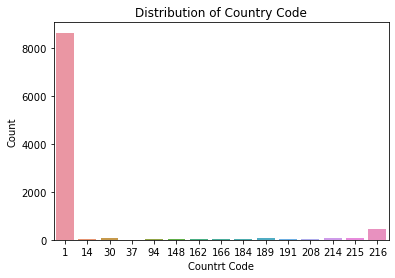

In [18]:
print('Country Code')

sns.countplot(x = 'Country Code', data = df)
plt.title('Distribution of Country Code')
plt.xlabel('Countrt Code')
plt.ylabel('Count')

plt.show()

**Observation:**
- Country code with 1 is highest restaurants compare to other countries.

### City

In [19]:
print('Distribution of Cities')

no_of_restaurants = df['City'].value_counts()
no_of_restaurants


Distribution of Cities


New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

### Cuisines

In [20]:
print('Distribution of Cuisines')

no_of_restaurants = df['Cuisines'].value_counts()
no_of_restaurants

Distribution of Cuisines


North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1826, dtype: int64

### Top 10 Cities with highest restuarants

Cities


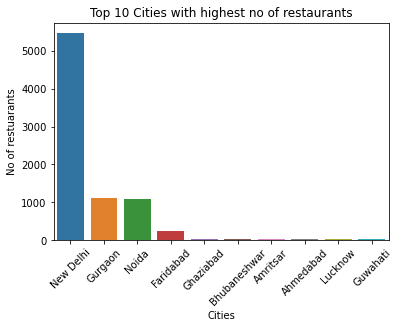

In [21]:
# Finding the top 10 cities with no of restaurants
print('Cities')

top_10 = df['City'].value_counts().head(10)

sns.countplot(x = 'City', data = df, order = top_10.index)
plt.title('Top 10 Cities with highest no of restaurants')
plt.xlabel('Cities')
plt.ylabel('No of restuarants')
plt.xticks(rotation=45)

plt.show()

### Top 10 Cuisines with highest restuarants

Cuisines


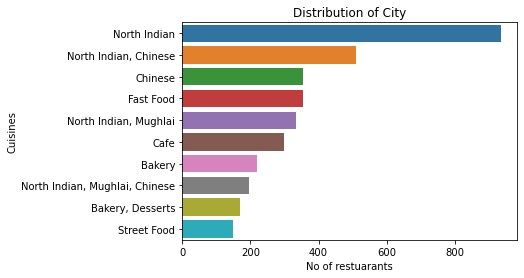

In [22]:
print('Cuisines')

top_10 = df['Cuisines'].value_counts().head(10)

sns.countplot(y = 'Cuisines', data = df, order = top_10.index)
plt.title('Distribution of City')
plt.ylabel('Cuisines')
plt.xlabel('No of restuarants')

plt.show()

## Insights of TASK-2

- Numerical Statistics: The mean, median, standard deviation, minimum, and maximum values for numerical columns provide insights into the spread and central tendency of the data.
- The ratings of restaurants vary from a minimum of 0 to a maximum of 4.9, indicating a diverse range of ratings in the dataset.
- The country code '1' hosts the highest number of restaurants in the dataset, highlighting its prominence in the culinary landscape.
- The dataset is characterized by a variety of cuisines, with North Indian cuisines being notably prevalent among the restaurants.
- New Delhi emerges as the city with the highest number of restaurants, suggesting a vibrant and diverse culinary scene in the capital.

# TASK-3 : Geospatial Analysis

### locations of restaurants

In [23]:
import geopandas as gpd

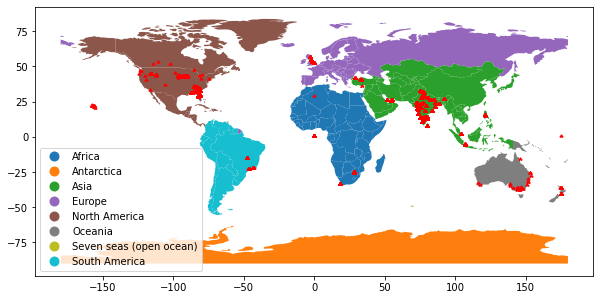

In [24]:
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

geo_df.plot(ax = world.plot('continent',legend = True, figsize = (10,8)), markersize=10,color='red',marker = 10)

plt.show()

### Distribution of restaurants across Countries

Cities


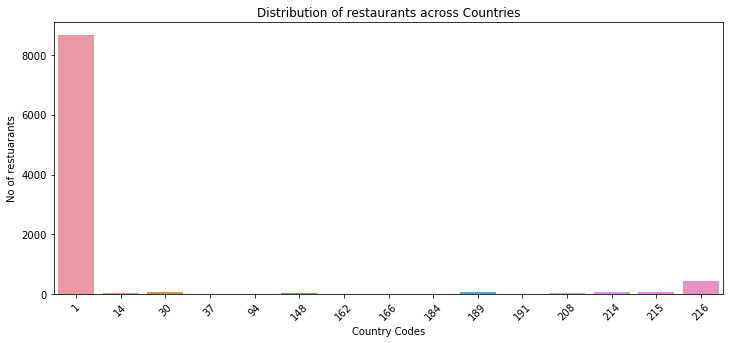

In [32]:
# Analyze the distribution of restaurants across different cities or countries.
print('Cities')

plt.figure(figsize=(12,5))

sns.countplot(x = 'Country Code', data = df)

plt.title('Distribution of restaurants across Countries')
plt.xlabel('Country Codes')
plt.ylabel('No of restuarants')
plt.xticks(rotation=45)

plt.show()

### Correlation between the restaurant's location and its rating

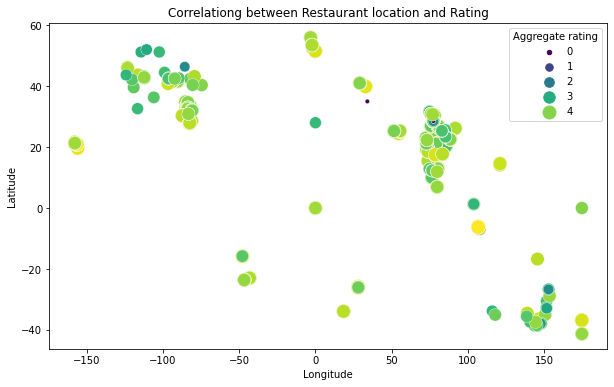

Correlation between latitute and longitude 0.04320728574930197


In [44]:
#Determine if there is any correlation between the restaurant's location and its rating.
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y = 'Latitude', hue= 'Aggregate rating', data=df, palette='viridis', size='Aggregate rating', sizes=(20,200))

plt.title('Correlationg between Restaurant location and Rating')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

correlation_coeff = df[['Latitude','Longitude','Aggregate rating']].corr().loc['Latitude','Longitude']
print('Correlation between latitute and longitude', correlation_coeff)

## Insights of TASK-3

- There are more restuarants in Asia and North America.
- The scatter plot explains the correlation between latitude, longitude and Aggregate ratings.
- The correlation is 0.04 which is a positive coefficient that suggests a positive correlation between location and rating.